In [1]:
# Import necessary libraries
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import func

# Create an engine to connect to the database
database_path = "C:/Users/messa/SQLalchemy-challenge/Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{database_path}")

# Reflect the database tables into classes
Base = automap_base()
Base.prepare(engine, reflect=True)

# Save references to the classes
Station = Base.classes.station
Measurement = Base.classes.measurement

# Create a session to interact with the database
session = Session(engine)


C:\Users\messa\AppData\Local\Temp\ipykernel_11100\2164917573.py:16: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [2]:
from sqlalchemy import func

most_recent_date = session.query(func.max(Measurement.date)).scalar()
print("Most recent date:", most_recent_date)


Most recent date: 2017-08-23


In [3]:
from datetime import datetime, timedelta

# Calculate the date 12 months ago from the most recent date
one_year_ago = datetime.strptime(most_recent_date, "%Y-%m-%d") - timedelta(days=365)

# Query the precipitation data for the last 12 months
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()


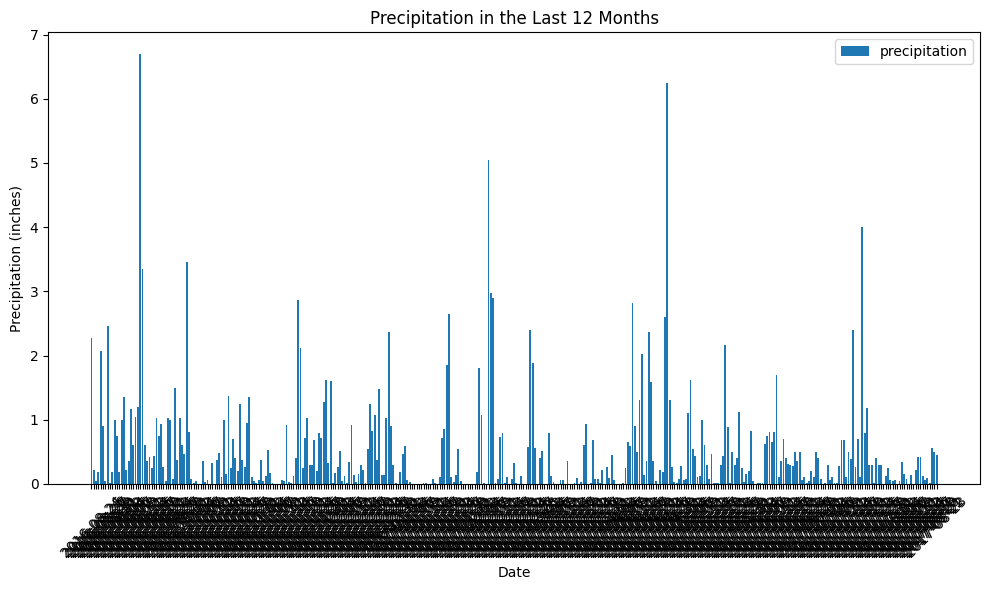

In [4]:
# Load data into a DataFrame
precipitation_df = pd.DataFrame(precipitation_data, columns=["date", "prcp"])

# Sort DataFrame values by date
precipitation_df.sort_values("date", inplace=True)

# Plot the precipitation data
plt.figure(figsize=(10, 6))
plt.bar(precipitation_df["date"], precipitation_df["prcp"], label="precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation in the Last 12 Months")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [5]:
summary_stats = precipitation_df.describe()
print(summary_stats)


              prcp
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


In [6]:
total_stations = session.query(Station.station).count()
print("Total number of stations:", total_stations)


Total number of stations: 9


In [7]:
from sqlalchemy import func

# Query to list stations and observation counts in descending order
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# Extract the most active station and its observation count
most_active_station = most_active_stations[0][0]
most_active_count = most_active_stations[0][1]

print("Most active station:", most_active_station)
print("Observation count:", most_active_count)


Most active station: USC00519281
Observation count: 2772


In [8]:
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()

print("Lowest temperature:", lowest_temp)
print("Highest temperature:", highest_temp)
print("Average temperature:", avg_temp)


Lowest temperature: 54.0
Highest temperature: 85.0
Average temperature: 71.66378066378067


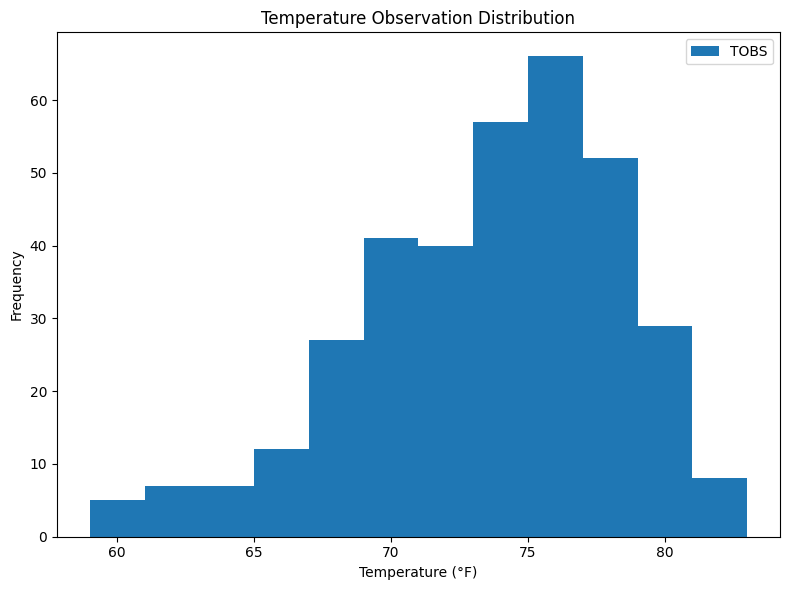

In [9]:
from datetime import datetime, timedelta

# Calculate the date 12 months ago from the most recent date
one_year_ago = datetime.strptime(most_recent_date, "%Y-%m-%d") - timedelta(days=365)

# Query TOBS data for the most-active station for the last 12 months
tobs_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station, Measurement.date >= one_year_ago).all()

# Convert to a list for plotting
tobs_list = [temp[0] for temp in tobs_data]

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(tobs_list, bins=12, label="TOBS")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.title("Temperature Observation Distribution")
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
    session.close()
